In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime

In [28]:
df=pd.read_csv("diminos_data.csv")

In [29]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [30]:
df.isnull().mean()

order_id              0.0
order_placed_at       0.0
order_delivered_at    0.0
dtype: float64

In [31]:
type(df.order_placed_at[0])

str

In [32]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [33]:
df.order_delivered_at=df.order_delivered_at.apply(lambda x: pd.to_datetime(x))

In [34]:
df['order_placed_time']=df['order_placed_at'].apply(lambda x: pd.to_datetime(x))

In [35]:
df.drop('order_placed_at',axis=1,inplace=True)

In [36]:
df.shape

(15000, 3)

In [37]:
df.rename({'order_placed_time':'order_placed_at'},axis=1,inplace=True)

## There are 15000 unique order_id i.e there is no clash of orderid and the data seems to be genuine

In [38]:
df.order_id.nunique()

15000

In [39]:
df

,order_id,order_delivered_at,order_placed_at
0,1523111,2023-03-01 00:18:07.443132,2023-03-01 00:00:59
1,1523112,2023-03-01 00:19:34.925241,2023-03-01 00:03:59
2,1523113,2023-03-01 00:22:28.291385,2023-03-01 00:07:22
3,1523114,2023-03-01 00:46:19.019399,2023-03-01 00:07:47
4,1523115,2023-03-01 00:25:13.619056,2023-03-01 00:09:03
...,...,...,...
14995,1538106,2023-03-27 23:52:37.409378,2023-03-27 23:37:05
14996,1538107,2023-03-28 00:04:22.672912,2023-03-27 23:47:38
14997,1538108,2023-03-28 00:05:40.676238,2023-03-27 23:50:16
14998,1538109,2023-03-28 00:08:41.810358,2023-03-27 23:52:44


In [40]:
df['delivery_time_mins']=(
    df['order_delivered_at']-df['order_placed_at']
).dt.total_seconds()/60


In [41]:
df

,order_id,order_delivered_at,order_placed_at,delivery_time_mins
0,1523111,2023-03-01 00:18:07.443132,2023-03-01 00:00:59,17.140719
1,1523112,2023-03-01 00:19:34.925241,2023-03-01 00:03:59,15.598754
2,1523113,2023-03-01 00:22:28.291385,2023-03-01 00:07:22,15.104856
3,1523114,2023-03-01 00:46:19.019399,2023-03-01 00:07:47,38.533657
4,1523115,2023-03-01 00:25:13.619056,2023-03-01 00:09:03,16.176984
...,...,...,...,...
14995,1538106,2023-03-27 23:52:37.409378,2023-03-27 23:37:05,15.540156
14996,1538107,2023-03-28 00:04:22.672912,2023-03-27 23:47:38,16.744549
14997,1538108,2023-03-28 00:05:40.676238,2023-03-27 23:50:16,15.411271
14998,1538109,2023-03-28 00:08:41.810358,2023-03-27 23:52:44,15.963506


## 95 percentile

In [42]:
p95 = df['delivery_time_mins'].quantile(0.95)
print(f"95th Percentile Delivery Time: {p95:.2f} minutes")

95th Percentile Delivery Time: 27.26 minutes


In [44]:
if p95<31:
    print("Store meets Diminos SLA")
else:
    print("Store violates Diminos SLA")


Store meets Diminos SLA


## How many orders are delayed?

In [45]:
delayed_pct=(df['delivery_time_mins']>31).mean()*100
print(f"Orders delayed >31 mins:{delayed_pct:.2f}%")

Orders delayed >31 mins: 3.71%


## Peak delay hours

In [46]:
df['hour']=df['order_placed_at'].dt.hour
df.groupby('hour')['delivery_time_mins'].quantile(0.95)

hour
0     28.866990
1     32.104821
2     26.845717
3     25.617373
4     26.259762
5     23.924907
6     26.493076
7     27.154475
8     27.207707
9     25.709020
10    26.759252
11    33.407016
12    24.327900
13    29.714826
14    27.891228
15    24.933851
16    32.438371
17    28.260021
18    24.104592
19    26.801610
20    28.237978
21    28.932870
22    24.611743
23    26.943743
Name: delivery_time_mins, dtype: float64

## Distribution of Delivery Time

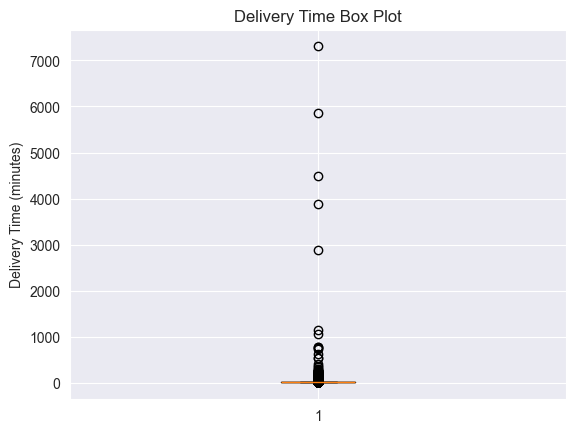

In [49]:
plt.figure()
plt.boxplot(df['delivery_time_mins'])
plt.ylabel('Delivery Time (minutes)')
plt.title('Delivery Time Box Plot')
plt.show()

In [55]:
df['hour']=df['order_placed_at'].dt.hour
p95=df.groupby('hour')['delivery_time_mins'].quantile(0.95)

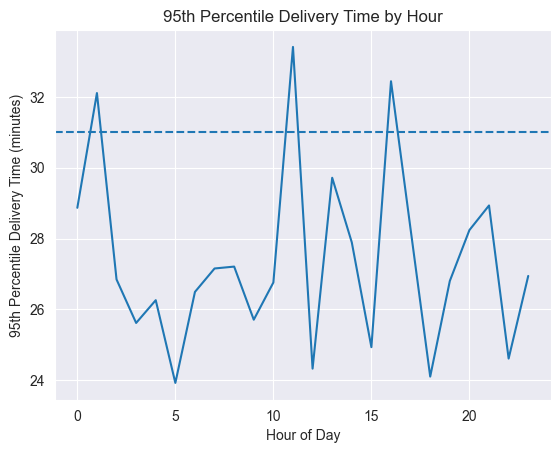

In [58]:
plt.figure()
plt.plot(p95.index,p95.values)
plt.axhline(31, linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('95th Percentile Delivery Time (minutes)')
plt.title('95th Percentile Delivery Time by Hour')
plt.show()
